# Brownian motion and Stochastic integrals 


### Assets and self-financing strategies


<div>
<img style="float: right;"src="images/invest.png" width="150" />
</div>


Money that is not needed for immediate consumption must be stored for later use. It may be kept in the form:
- cash
- savings account
- invested in government bond, corporate bonds, stock, etc.

Any item that can be used to store value will be referred to as an **asset**. Some assets are safe
in the sense that their future value can be predicted quite accurately; other assets
are risky and may bring large gains or severe losses. 




It is convenient to use the following
assumptions:
1. Assets are measured in units; the price of an asset refers to the price per unit
2. The value of a combination of assets - **portfolio** is the sum of the values of its constituent parts
3. Assets can be traded freely, without transaction costs, at any time and in any quantity
4. The price process is not impacted by the investor’s trades
5. Holding a fixed quantity of an asset brings no costs or dividends


A **portfolio (strategy)** is the number units of asset at time $t$:

$$\phi_t= (\phi_t^1, \dots, \phi_t^m)$$



According to 1. and 2., the **value of the portfolio (wealth of the investor)** at any given time $t$:

$$ Y_t = \sum_{i=1}^m \phi_t^i S_t^i $$
    
where $i=1, \dots m$ is an index used to distinguish different assets and $S_t^i$ is the price per unit of asset $i$ at time $t$.



A portfolio is **self-financing** if the investor does not take out money from, and does not invest money to the portfolio after time 0. This is equivalent to:

$$ Y_{t_{j+1}}  = Y_{t_j} + \sum_{i=1}^m \phi_{t_j}^i (S_{t_{j+1}}^i - S_{t_j}^i)$$

In words, this says that the portfolio value at time $t_{j+1}$ is equal to the value at
time $t_j$ plus the gains or losses that have been realized on the assets that constitute
the portfolio. 



If we want to monitor the value process of the portfolio thorugh a time interval $[0, T]$:
   
$$ Y_T = Y_0 + \sum_{j=0}^n \phi_{t_j}^T \Delta S_{t_j} $$
    
 where $\Delta$ is the forward difference operator.
 
 
In case of continous time:

$$ Y_T = Y_0 + \int_0^T \phi_t^T dS_t$$

- In some cases we are able to derive pricing formulas based on arbitrage considerations, without implementing model for the price of the assets. This is possible when we were looking at sufficently simple instruments.

<div>
<img style="float: left;" src="images/bank.jpg" width="250"/>
</div>





- If we would like to price more complex instruments, for example options and other credit derivatives, we will need a model for the asset price.


#### This model will be based on stochastic processes. 

### What is a stochastic process?

Some ideas that capture the essence of stochatis process:
- random evolution
- random function
- random path

Formally : A stochastis process is a family of random variables $X_t$ indexed by a parameter $t$, that can be interpreted as time.

$ X_0,X_1, X_2, X_3,  . . . $



The sample paths of a stochastic process are the actual realized paths that could be followed by a stochastic process.
<div>
<img src="images/crude-oil-price.jpg" width="500"/>
</div>

### Coin tossing 
<div>
<img src="images/200ft.png" width="50"
     alt="alt_text" align="righ"/>
</div>
Our first idea is to model the price of an asset with a process that moves up 1 or down by 1 with equal probability. Let's see the behaviour of this process.



The dynamics can be modelled as follows:
1. We start at 0.
2. At time 1, flip a coin. If head, price goes from 0 to 1. If tails, from 0 to -1.
3. At time 2, starting from the new position (+1 or -1) flip the same coin again and move either up or down according to step 2.
4. Repeat for $n$ steps.

Denote the jth move by $X_t$:

$P(X_t=1)=0.5$, $P(X_t=-1)=0.5$ and $S_n=\sum_{t=1}^n X_t$

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random

def randomwalk1D(n):

    coin = [-1, 1] #Tails and head

    # Randomly select either UP or DOWN
    steps = np.random.choice(coin, size=(1,n))
        
    # Sum up the values
    path = np.cumsum(steps)
    # Add the starting point
    path = np.concatenate([[0], path])
        
    return path

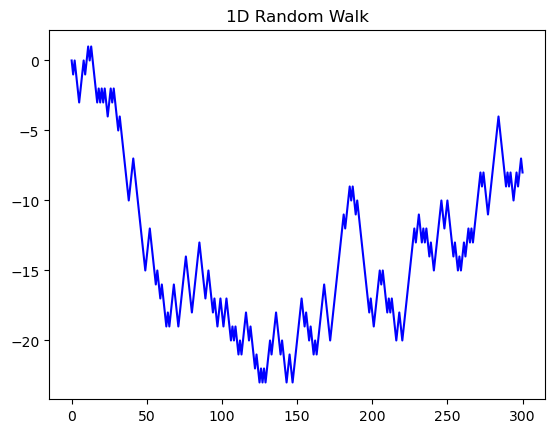

In [48]:
path = randomwalk1D(300)

plt.plot(path, 'b-')
plt.title("1D Random Walk")
plt.show()

### Let's look at the properties of this process:

Let's take a partion of the interval $0=t_0 < t_1 < \dots < t_n < t_{n+1}= T$.

The discrete-time stochastic process $S_{t_0}, S_{t_1}, S_{t_2}, \dots $ satisfies for any time:
- independent increments: $(S_{t_1}-S_{t_0}), (S_{t_2}-S_{t_1}), (S_{t_3}-S_{t_2}), \dots$
- $E(S_{t_{i+1}}-S_{t_i})=0$
- variance accumulates at rate one per unit time: $Var(S_{t_{i+1}}-S_{t_i})= t_{i+1}-t_i$



In [13]:
mean = lambda x: round(np.mean(x),3)
[mean(time_slice) for time_slice in pos_data[1:10]]

[1.0, 2.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 1.0]

In [14]:
variance = lambda x: round(np.var(x),3)
[variance(time_slice) for time_slice in pos_data[1:10]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

#### What did we miss?

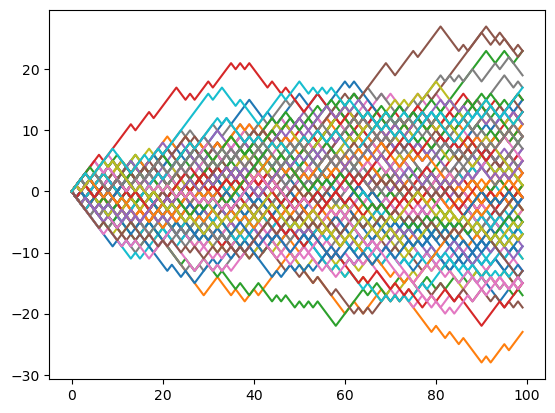

In [50]:
sim = 100
M = np.empty((sim, 0))
for k in range(0, sim, 1):
    pos_data = randomwalk1D(99)
    pos_data = np.array(pos_data).reshape(100,1)
    M = np.hstack((M,pos_data))
    
plt.plot(M);

In [51]:
[mean(time_slice) for time_slice in M[1:10]]

[-0.1, -0.12, 0.02, -0.04, -0.08, -0.08, -0.1, -0.26, -0.34]

In [46]:

[variance(time_slice) for time_slice in M[1:10]]

[1.0, 2.078, 3.23, 4.51, 5.96, 6.074, 7.054, 8.276, 9.08]

- finite expected value: $E(|S_{t_n}|)< \infty$
- memoryless : $E(S_{t_{n+1}}| S_{t_0}, S_{t_2}, \dots, S_{t_n} )= S_{t_n} $ conditional expectation of next value in sequence is current position

Stochastic processes with the last two properties will be called a **discrete-time martingales**. 

<div>
<img style="float: right;"src="images/roulette.jpg" width="200" />
</div>

### Problems with the current model:

<div>
<img style="float: left;" src="images/crude-oil-price.jpg" width="350" />
<img style="float: right;" src="images/1Drandomwalk.png" width="350" />
</div>






1. discreteness: we usually think of an asset price as something evolving continously in time, at least while markets are open.

2. fixed unit increment: random walks only moves by a fixed unit. Asset prices can move by almost any dollar amount at all.

### Problems with the current model:

<div>
<img style="float: left;" src="images/crude-oil-price.jpg" width="350" />
<img style="float: right;" src="images/1Drandomwalk.png" width="350" />
</div>


3. fails to replicate: 
- variance can increase very fast

- doesn't take into accound trends 

- random walk tend to have negative values 

This is not very realistic.

These observations suggest that we might find a better model by taking some kind of limiting case of the random walk as the size of the moves gets smaller but the frequency of the moves increase.

If we choose the time step to be infinitely small the variance goes to infinity. We have to scale down or shrink the size of moves.


CLT theorem says that if we take the sum $\sum_{t=1}^n X_t$ of i.i.d. random variables and divide it by it's standard diviation it would converge to something with a normal distribution.

<div>
<img style="float: left;"src="images/sheeps.png" width="150" />
</div>

Let's choose $\alpha = \sqrt{n}$ scaling factor and look at:

$$ S_t^{(n)}=\sum_{i=1}^{nt}\frac{X_i}{\sqrt{n}} $$

In [66]:
import math

def scaledrandomwalk1D(n):
    t=10
    # Generate steps for time point [1, 2, 3, ... , n*t]
    coin_scaled = [-1/np.sqrt(n), 1/np.sqrt(n)] #Tails and head with scaling
        
    # Randomly select either UP or DOWN
    steps = np.random.choice(coin, size=(1,n*t))
        
    # Sum up the values
    path = np.cumsum(steps)
    # Add the starting point
    paths = np.concatenate([[0], path])
        
    return path

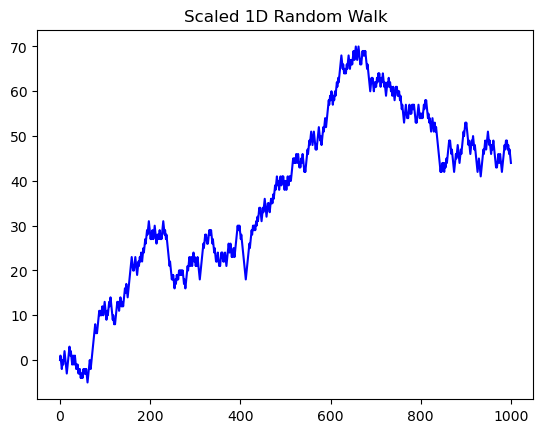

In [67]:
path = scaledrandomwalk1D(100)

plt.plot(path, 'b-')
plt.title("Scaled 1D Random Walk")
plt.show()

In [68]:
sim = 100
Mscaled = np.empty((sim, 0))
for k in range(0, sim, 1):
    pos_data = scaledrandomwalk1D(10)


In [19]:
[mean(time_slice) for time_slice in Mscaled[1:10]]

[-0.032, -0.063, -0.032, -0.038, -0.038, 0.006, 0.019, -0.044, -0.101]

In [20]:
[variance(time_slice) for time_slice in M[1:10]]

[0.99, 1.796, 2.888, 4.248, 5.284, 5.108, 5.97, 7.406, 8.27]

### Is it converging to something sensible?

### Yes, to a Brownian motion (Wiener process) as $ n \rightarrow \infty $.

$$ S_t^{(n)} \rightarrow W_t$$

In the sense of "weak convergence of stochastic processes"

Brownian motion is a continous time stochastic process, conventionally denoted as $W_t$ or $B_t$ with the following properties:
<div>
<img style="float: right;" src="images/wiener.jpg" width="400"/>
</div>

1. $W_0$ = 0
2. independent increments: $(W_{t_1}-W_{t_0}), (W_{t_2}-W_{t_1}), (W_{t_3}-W_{t_3}) $
3. the distribution of the increment $W_{t_2}-W_{t_1} \sim N(0,t_2-t_1)$ 
4. has continous sample paths (almost surely)
                                                                                     

### Further properties:

Let's take a partition  of the interval: $0< t_0 < t_1 < \dots < t_{n-1} < t_{n} <t_{n+1} = T$
- Brownian motions does not have bounded variation for an arbitrary small partion of the interval:
$$ \sum_{i=0}^{n} |W_{t_{i+1}} - W_{t_{i}}| \rightarrow \infty $$
- a strongher property is also true: Wiener process is nowhere differentiable

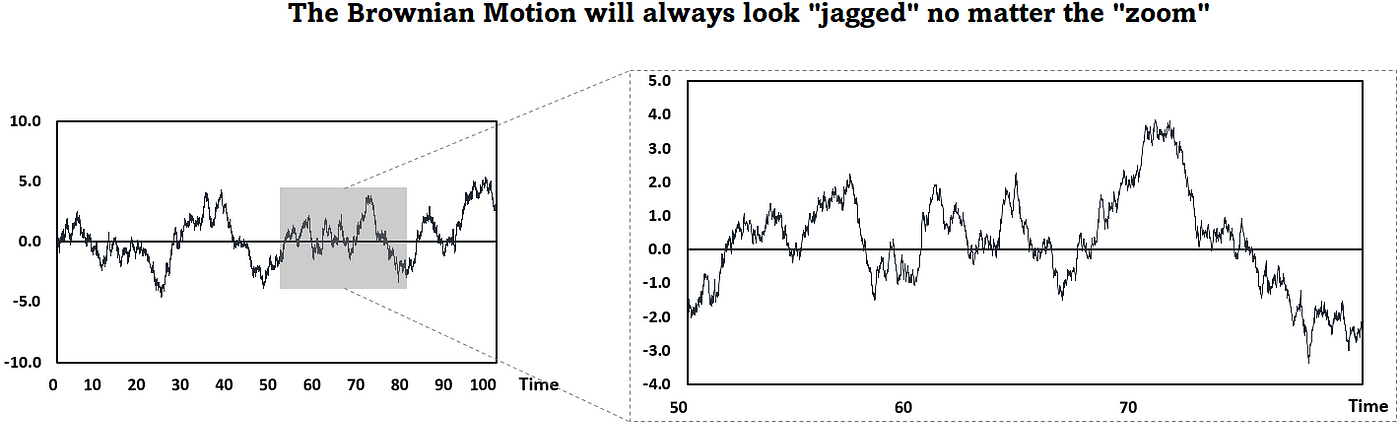


### Further properties:
- Wiener process has bounded quadratic variation:
$$ Q_{P} := \sum_{i=0}^n (W_{t_{i+1}} - W_{t_{i}})^2$$
then
$$ E(Q_P) := lim_{||P|| \rightarrow \infty}  \sum_{i=0}^n (W_{t_{i+1}} - W_{t_{i}})^2 = T$$

In [73]:
def brownianmotion(n):
    t = 10 # time
    dt = t/n # time step

    # Simulate normal distributed variable
    steps = np.random.normal(0, np.sqrt(dt), size=(1,n))
        
    # Sum up the values
    path = np.cumsum(steps)
    # Add the starting point
    paths = np.concatenate([[0], path])
        
    return path

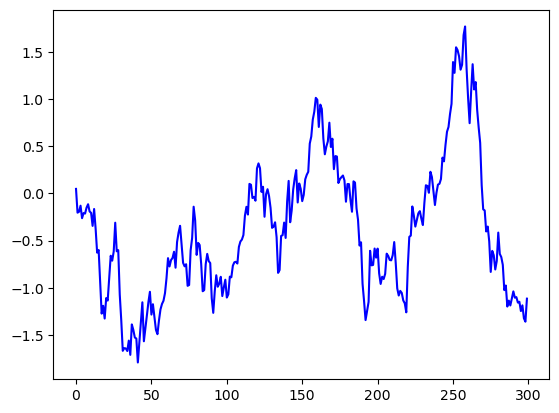

In [74]:
bm = brownianmotion(300)
plt.plot(bm, 'b-');

In [75]:
sim = 100
bm_paths = np.empty((sim, 0))
for k in range(0, sim, 1):
    bm = brownianmotion(100)
    bm = np.array(bm).reshape(100,1)
    bm_paths = np.hstack((bm_paths,bm))

In [76]:
[mean(time_slice) for time_slice in bm_paths[1:10]]

[0.104, 0.099, 0.092, 0.103, 0.12, 0.149, 0.197, 0.228, 0.265]

In [77]:
[variance(time_slice) for time_slice in bm_paths[1:10]]

[0.207, 0.28, 0.369, 0.461, 0.553, 0.569, 0.666, 0.799, 0.943]

In [78]:
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
[quadratic_variation(time_slice) for time_slice in bm_paths.T[:10]]

[8.147, 10.795, 11.564, 8.769, 9.474, 9.395, 8.87, 11.657, 9.077, 8.961]

### Problems with the current model:

1. discreteness: solved

2. fixed unit increment: solved

3. fails to replicate: 
- variance can increase very fast:mostly solved

- doesn't take into accound trends 

- random walk tend to have negative values 

- size of the moves does not scale with the price level 
( a \$ 10 move is just as likely for an asset trading at 15 as one trading at 250.)







Add a term to the Brownian motion that represents a trend and a volatility factor:
$$W_{t; \mu, \sigma} = \mu t + \sigma W_t$$

This will be called **Brownian motion with a drift**, with $\mu t $ drift and $\sigma $ volatility.

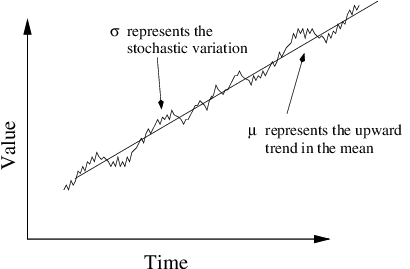

##### Non-negative values and moves that scale with price level?

#### Idea:

Let's condiser and model changes in $\log (S_t)$ and let $\psi(t) = log(S_t)$. 

$$ S_t = e^{\psi (t)}$$

Price is non-negative.



If $ \psi (t+1)= \psi (t) + \delta $ then
$$ S_{t+1} = e^{\psi (t+1)} = e^{\psi(t)+\delta} = e^{\delta}e^{\psi(t)} = e^{\delta}S_t$$

This is a multiplicative updating, scales with price.  So the price change can be written:

$$ S_{t+1} - S_t = e^{\delta}S_t - S_t = (e^{\delta}-1)S_t $$

So a fixed additive move in $\log S_t$ implies a price move that scales with price level.

These considerations lead us to consider modelling $\log(S_t)$ as a Brownian motion rather than $S_t$ itself:

$$ \log(S_t) = \mu t + \sigma W_t $$


                


Also, an initial value $S_0$ should be included:

$$ \log(S_t) = \log(S_0) + \mu t + \sigma W_t$$

We exponenciate both sides:
 
$$ S_t = S_0  e^{\mu t + \sigma W_t} $$

This model is called the **Geometric Brownian motion**.

### Is it good enough?

In [79]:
import math

def geometricbrownianmotion(n, S0, mu, sigma, t):
    dt = t/n # time step

    # Simulate the variable
    St = np.exp(
        (mu-sigma**2/2)*dt + sigma * np.random.normal(0, np.sqrt(dt), size=(1,n)).T
    )
    #include array of 1's
    St = np.vstack([np.ones(1), St])

    # Move the object 
    St = S0 * St.cumprod(axis=0)
        
    time = np.linspace(0,t, n+1)
    
    return time, St


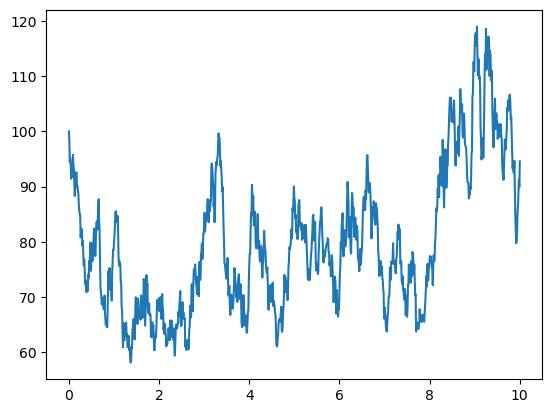

In [80]:
mu = 0.1
sigma = 0.3
S0 = 100
n = 1000 #increase n
t=10
tt, St = geometricbrownianmotion(n, S0, mu, sigma, t)
plt.plot(tt, St) ;

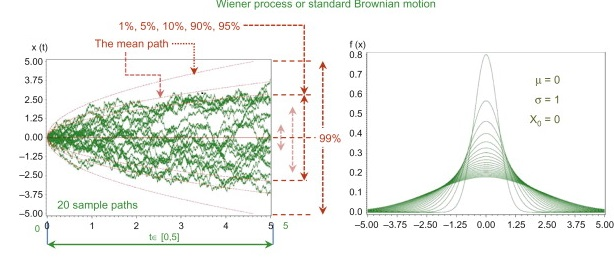
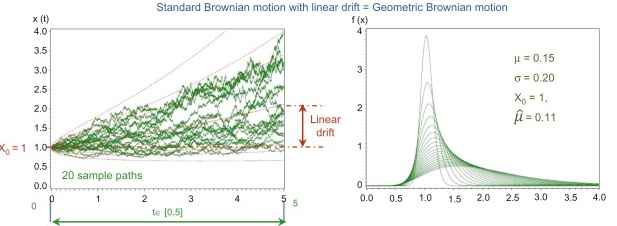

Initially we wanted to model the value of the portfolio.

If we take $ S_t = S_0  e^{\mu t + \sigma W_t} $ the change in the asset price

$$ \frac{d S_t}{dt} = \left[ \mu + \sigma \frac{d W_t}{dt}\right] S_0  e ^{\mu t + \sigma W_t} =  \left[\mu + \sigma \frac{dW_t}{dt}\right] S_t = \mu S_t + \sigma S_t \frac{d W_t}{dt} $$




    
In differential form:

$$ d S_t = \mu S_t dt  + \sigma S_t d W_t$$

### What is the derivate of the Brownian motion?

<div>
<img style="float: right;" src="images/derivate.png" width="300"/>
<img style="float: left;" src="images/integral.png" width="300"/>
</div>
### Stochastic calculus

- Problems: Brownian motion is not differentiable at any given point
- Ordinary calculus: Differentiation (gradient) $\rightarrow$ Integration (area)
- Stochastic calculus: Ordinary calculus + randomness, Integration $\rightarrow$ Differentiation 
- How to define:
$$ \int_{0}^{T} X_t d Z_t = ? $$

where $X_t$ and $Z_t$ are stochastic processes that satisfy certain conditions.


### Rieman approach
- $\int_{a}^b f(t)dt$
- partition: 
$$ P_{n} = \{t_{0}, t_1, \dots, t_n\} $$
- sums: 
$$L(P_n, f) = \sum_{i=1}^{n}f(t_{i-1})(t_i - t_{i-1}), U(P_n, t) = \sum_{i=1}^{n}f(t_{i})(t_i - t_{i-1})$$


### Stieltjes approach
- $g(t)$: monotonic and bounded variation
- $\int_{a}^b f(t)dg(t)$
- sums: 
$$L(P_n, f,g) = \sum_{i=1}^{n}f(t_{i-1})(g(t_i) - g(t_{i-1})) $$
$$U(P_n, f,g) = \sum_{i=1}^{n}f(t_{i})(g(t_i) - g(t_{i-1}))$$



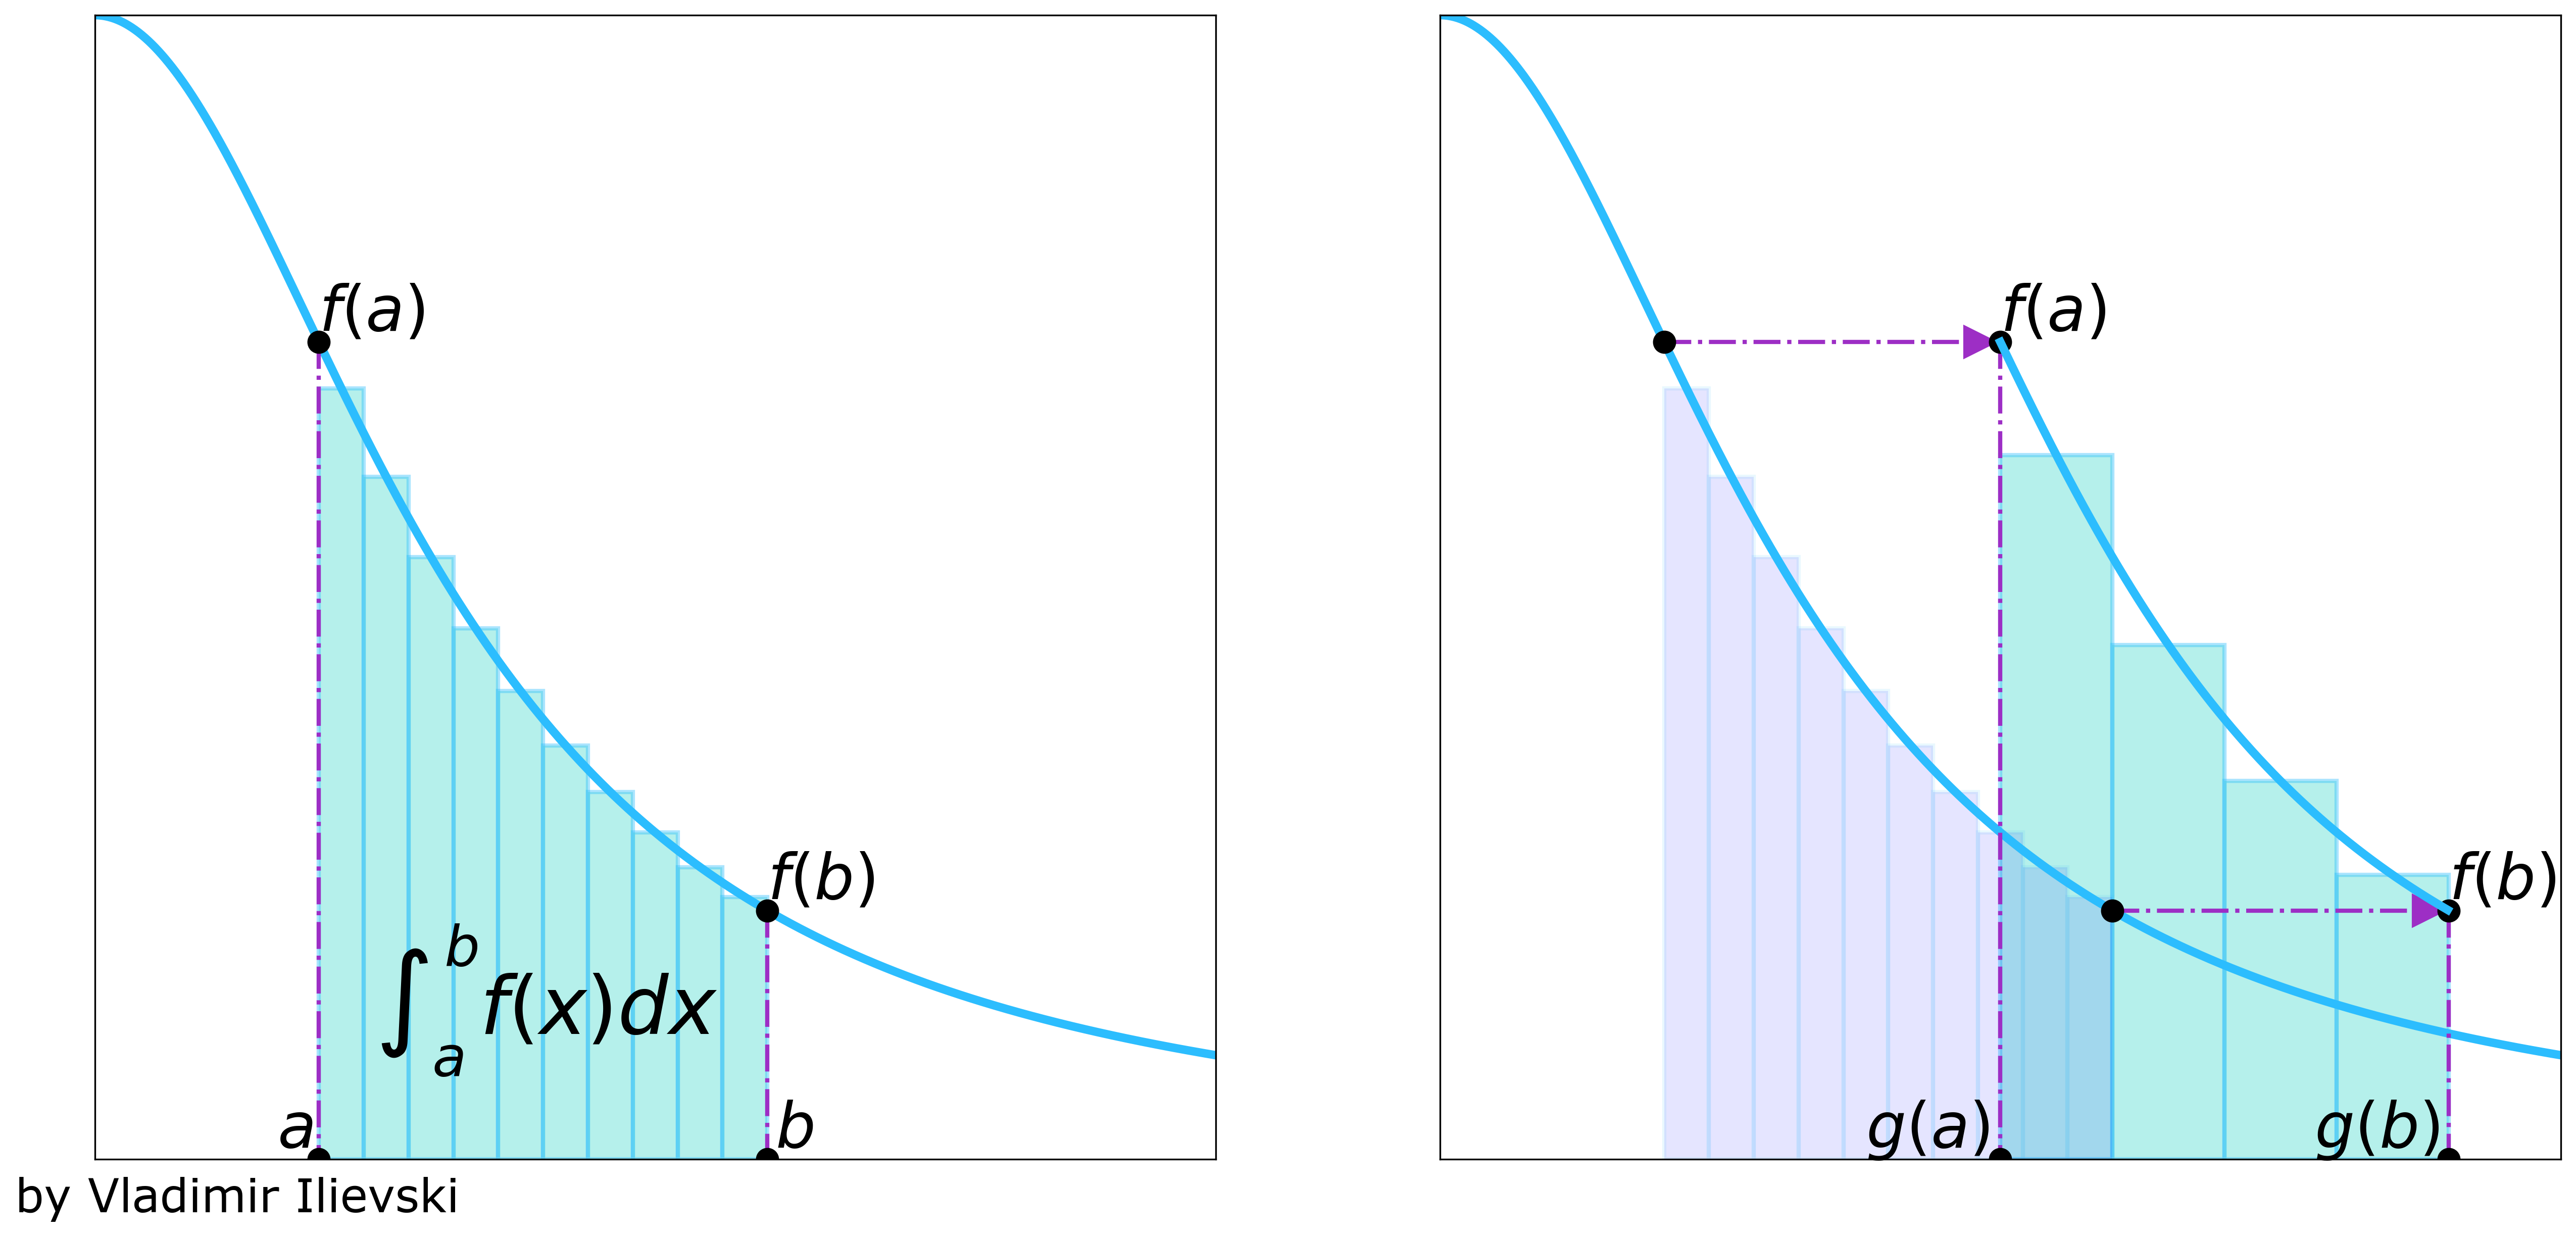

<div>
<img style="float: left;" src="images/stochasticint.png" width="400"/>
</div>


### Stochastic integral
For any partioning $0 = t_0 < t_1 < \dots < t_{n+1} = T $ of the interval $[0, T]$ we can form the sum:

 $$ \sum_{j=0}^n X_{t_j} (Z_{t_{j+1}} - Z_{t_j}) $$
 
 which defines a random number. 


Suppose now that the processes $X_t$ and $Z_t$ satisfy the following
properties:

1. The process $X_t$ is adapted to the process $Z_t$. This means intuitively that, for
any $t$, $X_t$ can be written as a function of the values of $Z_s$ for $s ≤ t$.

2.  The process $Z_t$ is a martingale.

It can be shown that, under suitable continuity and boundedness conditions, these properties guarantee that one can indeed define a stochastic integral by the formula


$$ \int_{0}^{T} X_t d Z_t = \lim_{\Delta t \rightarrow 0} \sum_{j=0}^n X_{t_j} (Z_{t_{j+1}} - Z_{t_j}) $$
 
The limit is understood in the
stochastic sense of convergence in probability.

Basic rules for stochastic integration:

1. Telescope rule:
$$ \int_0^T dZ_t = Z_T - Z_0$$

2. Linearity with respect to the integrand:

$$ \int_0^T (a X_t + b Y_t)dZ_t  = a \int_0^T X_t dZ_t + b \int_0^T Y_t dZ_t$$

3. Linearity with respect to the integrator:

$$ \int_0^T  X_t d(a Y_t + b Z_t)  = a \int_0^T X_t dY_t + b \int_0^T Y_t dZ_t$$



#### Problem: 
Calculation by definition is time consuming and non-trivial.

### Example

$$ \int_0^{T}W_t dW_t= ?$$



We know that:  

$$ \int_{0}^{T} W_t d W_t = \lim_{\Delta t \rightarrow 0} \sum_{i=0}^{n} W_{t_i} (W_{t_{i+1}} - W_{t_i}) $$




$$  \sum_{i=0}^{n} W_{t_i} (W_{t_{i+1}} - W_{t_i}) =  \sum_{i=0}^{n} \frac{1}{2}( W_{t_{i+1}}+W_{t_i})(W_{t_{i+1}}-W_{t_{i}}) (W_{t_{i+1}} - W_{t_i})  $$


$$ = \sum_{i=0}^{n} \frac{1}{2} (W_{t_{i+1}}^2 - W_{t_i}^2) - \frac{1}{2}(W_{t_{i+1}}-W_{t_i})^2 $$

Applying the telescope rule and that $W_0=0$, we get that the first term is $\frac{1}{2} W_{t_n}^2$.

Due to the bounded quadratic variation of the Brownian motion:

$$ \frac{1}{2}\sum_{i=0}^{n}(W_{t_{i+1}}-W_{t_i})^2 \rightarrow \frac{T}{2}$$

So the integral becomes:

$$ \int_0^{T}W_t dW_t= \frac{1}{2}(W_t^2-T)$$

### Processes defined by stochastic integrals

In the trading interpretation the result is monitored continuously rather than just over a fixed
period.  In this way one defines, starting from a given process $Z_t$ and a process
$X_t$ adapted to $Z_t$, a new process $Y_t$ by:

$$ Y_t  = Y_0 + \int_0^T X_t dZ_t$$

The process $Y_t$ is said to be an **integral transform** of the process $Z_t$ by means of the process $X_t$.



In economic terms, $Y_t$ can be viewed as the wealth process that is generated from a given asset price process $Z_t$ by the application of a
trading strategy $ X_t$.


In differential form:

$$ dY_t = X_t d Z_t $$

### Let's go back to ordinary calculus

The Fundamental theorem of calculus says that if $f$ is a differentiable function:

$$f(t)=f(0) + \int_0^T f'(t)dt $$

It states that the two basic operations
of calculus, integration and differentiation, are each other’s inverse. The rule above may also be written in the form:

$$df(t)=f'(t)dt $$


 


<div>
<img style="float: left;" src="images/taylor.png" width="300"/>
</div>

This means that the change in $f$ is *proportial* to the change in $t$.
For small changes in the variable, second-order and higher terms are negligible compared to the first-order terms.

One of the most fundamental tools from ordinary calculus is the chain rule: if $f(t)=\phi(g(t))$, then

$$f'(t)= \phi'(g(t))g'(t)$$

This may be extended in the context of
Riemann-Stieltjes integrals.  A special case arises when the integrand $f(t)$ is of the form $f(t) = \phi'(g(t))$
where $\phi$ is a smooth function and $g$ is a continuous function
of bounded variation. Then one can prove that the following formula holds:

$$ d\phi(g(t)) = \phi'(g(t))dg(t)$$

 This may also be written as
 
 $$ \int_0^T \phi '\left(g(t)\right)dg(t) = \phi(g(T)) - \phi(g(0))$$.

If one looks at the trajectories of Brownian motion, it turns
out that (with probability 1) they fall in this peculiar class of functions that are not
of bounded variation on any interval. Some good news is, that the paths of Brownian motion are still of bounded quadratic variation. 

From the use of telescope rule and Taylor series expansion:

$$ \phi(g(T)) - \phi(g(0)) = \sum \phi(g(t_{i+1})-\phi(g(t_i))) = \sum \phi '(g(t_i))(g(t_{i+1})-g(t_i)) + \sum \frac{1}{2} \phi''(g(t_i))(g(t_{i+1})-g(t_i))^2+\dots  $$

If the function $g$ is not of bounded variation, but is still of bounded quadratic variation, then it can be shown that the“cubic
variation” $\sup \sum(g(t_{i+1}) − g(t_i))^3$ is zero, which means that the terms of order three in can be neglected. 

Then we are justified in writing:

$$ \phi(g(T)) - \phi(g(0)) = \int_0^T(\phi'(g(t))dg(t) +\frac{1}{2} \phi''(g(t))(dg(t))^2$$

On the basis of the continuous telescope rule

$$ d\phi(g(t)) = \phi'(g(t))dg(t) +\frac{1}{2} \phi''(g(t))(dg(t))^2 $$

This will be called **Ito's rule** for $\phi$ twice continously differentiable and for $g(t)$ continous processes of finite quadratic variation.




> Rules of stochastic calculus:
> - $(dW_t)^2 = dt$
> - $dt dW_t = 0$
> - $(dt)^2=0$

### Ito process

We will be interested in a special class of stochastic processes called **Ito drift diffusion processes**:

$$ X_t = X_0 + \int_0^T \mu(t, X_t) dt+ \int_0^T \sigma(t, X_t) dW_t $$

where the first term is a Riemann integral (drift term) and the second one is a stochastic integral (diffusion term).

In differential form:

$$ dX_t = \mu_t dt +\sigma_t dW_t $$

If we want to value some financial contract, then we would like to understand the dynamics of $\phi(X_t)$.
If $\phi(x)$ is a twice continously differentiable function, applying Ito's rule:

$$d\phi(X_t) = \frac{\partial \phi}{\partial X} dX_t +\frac{1}{2}\frac{\partial^2 \phi}{\partial X^2}(dX_t)^2$$

$$d\phi(X_t) = \frac{\partial f}{\partial X} dX_t +\frac{1}{2}\frac{\partial^2 \phi}{\partial X^2}(dX_t)^2$$

If we substitute: 
$$(dX_t)^2 = (\mu_t dt+\sigma_t d W_t)^2 = (\sigma_t dW_t)^2 = \sigma_t^2 dt $$







$$ d\phi(X_t) = \mu_t \frac{\partial \phi}{\partial X}(X_t)dt  +\sigma_t \frac{\partial \phi}{\partial X}(X_t) dW_t +\frac{1}{2} \sigma_t^2 \frac{\partial^2 \phi}{\partial X^2}(X_t) dt $$

Which in integral form:



$$\phi'(X_t) = \phi(X_0) + \int_0^T \mu_ t \phi'(X_t)dt +\int_0^T \sigma_ t \phi'(X_t)dW_t + \frac{1}{2} \int_0^T \sigma_t^2 \phi''(X_t)dt $$




$$\phi(X_t) = \phi(X_0) + \int_0^T \phi'(X_t)dX_t + \frac{1}{2} \int_0^T \sigma_t^2 \phi''(X_t)dt $$

Is called **Ito's formula (Ito's lemma)**.

### Back to the previous example

$$\int_0^T W_t dW_t=?$$

We know that: $\phi(X_t) = \phi(X_0) + \int_0^T \mu_ t \phi'(X_t)dt +\int_0^T \sigma_ t \phi'(X_t)dW_t + \frac{1}{2} \int_0^T \sigma_t^2 \phi''(X_t)dt $




Let us represent the Brownian motion as an Ito process:

$ \mu_t = 0$, $\sigma_t=1$ and $\phi(x)=x^2$, $X_t=W_t$

$$W_t^2 = W_0^2 + \int_0^T 2 W_t d W_t +\frac{1}{2} \int_0^T 2 dt$$


So we get:

$$\int_0^T W_t dt = \frac{1}{2}(W_t^2-t)$$

### Back to the geometric Brownian motion


The representation of $X_t$ az an Ito process:

$ \mu_t = \mu, \sigma_t = \sigma$
$$X_t = X_0 +\int_{0}^T \mu X_t dt +\int_0^T \sigma X_t d W_t$$


Using the Ito's formula for $\phi(x)=\log x$:

$$\log X_t = \log X_0 + \int_0^T \frac{1}{X_t}(\mu X_tdt+\sigma X_t dW_t)+\frac{1}{2}\int_0^T -\frac{1}{X_t^2}\sigma^2 X_t^2dt$$ 

$$= \log X_0 + \sigma W_t +(\mu-\frac{\sigma^2}{2})t  $$

From here:

$$X_t=X_0 \cdot e^{\sigma W_t+(\mu - \frac{\sigma^2}{2})t}$$

### Summary

- value process of the portolfio:

$$ Y_T = Y_0 + \int_0^T \phi_t^T dS_t$$

- model the asset price:

<div>
<img style="float: right;" src="images/browniandrift.png" width="300"/>
</div>

$$log(S_t) = \mu t +\sigma W_t $$

$$S_t = S_0 e^{\mu t +\sigma W_t} $$

- changes in the asset price can be viewed as:

$$dS_t = \mu S_t + \sigma S_t dW_t$$



### Summary

- define derivate with respect to a stochastic process:

<div>
<img style="float: right;" src="images/stochasticint.png" width="150"/>
</div>

$$\int_0^T X_tdZ_t = \lim_{\Delta t \rightarrow 0} \sum_{j=0}^n X_{t_j}(Z_{t_{j+1}}-Z_{t_j})$$

- Ito's rule to calculate the derivate when applying the stategy $\phi$:

$$ d \phi(X_t) = \phi(X_t) dX_t + \frac{1}{2}\phi''(X_t)(dX_t)^2 $$

- when $X_t$ is a drift diffusion process:

$$\phi'(X_t) = \phi(X_0) + \int_0^T \mu_ t \phi'(X_t)dt +\int_0^T \sigma_ t \phi'(X_t)dW_t + \frac{1}{2} \int_0^T \sigma_t^2 \phi''(X_t)dt $$

### We have a model for the asset price and a way to calculate changes in the portfolio value !!!

### References

- Cameron Connell, *Financial Derivatives course*, accessed on 2023 August

- Peter Kevei, *Financial mathematics lecture notes* (University of Szeged, 2020)

- QuantPy youtube channel, accessed on 2023 August

- Schumacher, J. M., *Introduction to Financial Derivatives*, (Open Press TiU, 2020)

- Tony R. Kuphaldt, *Lessons in Industrial Automation*, Control Aumation, accessed on 2023 August

- Vladimir Ilievsky, *Integrals are Fun - Illustrated Riemann-Stieltjes Integral*, iSquared, accessed on 2023 August




